In [1]:
!pip install wordcloud

In [2]:
from wordcloud import WordCloud              # 워드 클라우드 import
from collections import Counter              # 워드를 카운팅해주는 라이브러리
import matplotlib.pyplot as plt              # matplotlib : 데이터를 시각화 해주는 라이브러리

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup as bs
import pandas as pd

In [4]:
driver =  webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN')

In [5]:
soup = bs(driver.page_source, 'html.parser')   

In [6]:
url = soup.select('a.news')

In [7]:
for i in url:
    print('https://news.sbs.co.kr/'+i['href'])

https://news.sbs.co.kr//news/endPage.do?news_id=N1006897794
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897924
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897926
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897785
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897879
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897784
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897909
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897868
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897422
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897783


In [8]:
url2 = soup.find_all('a', class_='news')

In [9]:
for i in url2:
    print('https://news.sbs.co.kr/'+i['href'])

https://news.sbs.co.kr//news/endPage.do?news_id=N1006897794
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897924
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897926
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897785
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897879
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897784
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897909
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897868
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897422
https://news.sbs.co.kr//news/endPage.do?news_id=N1006897783


In [10]:
url_list=[]
for i in range(1,6):
    page_url = 'https://news.sbs.co.kr/news/newsflash.do?plink=NEW&cooper=SBSNEWSMAIN&pageIdx=2'.format(i)
    driver.get(page_url)
    time.sleep(2)
    
    soup = bs(driver.page_source, 'html.parser') 
    url = soup.select('a.news')
    for i in url:
        url_list.append('https://news.sbs.co.kr/'+i['href'])

In [11]:
title_list=[]
contents_list=[]

# url 페이지 열기
for url in url_list:
    driver.get(url)
    time.sleep(1)
    soup = bs(driver.page_source, 'html.parser') 
    
    #제목
    title = soup.select('h2.blind.ir')
    for i in title:
        title_list.append(i.text)

    #내용
    contents =  soup.select('div.text_area')
    for i in contents:
        contents_list.append(i.text)

In [12]:
contents_list

['\n  <앵커>\n  \n 오징어게임에 이어 남미 국가 수리남을 무대로 한 한국 드라마가 전 세계에 열풍입니다. 그런데 수리남 정부가 자국을 마약 밀매의 온상처럼 그렸다고 공식 반발하면서 외교 문제로 비화할 조짐을 보이고 있습니다.\n  \n 김민정 기자가 수리남 교민을 통해서 현지 분위기를 들어봤습니다.\n  \n <기자>\n  \n 넷플릭스 드라마 수리남은 남미 수리남의 마약왕으로 불리던 한국인과 그를 추적하는 국가정보원의 이야기를 담고 있습니다.\n  \n 드라마가 세계적인 인기를 끌자 수리남 정부가 발끈하고 나섰습니다.\n  \n 수리남 외교장관은 "드라마에서 마약을 거래하는 부정적 이미지로 형편없이 묘사됐다"며 "받아들일 수 없고, 부당하다"고 밝혔습니다.\n  \n 제작사를 상대로 법적 대응을 검토하고 우리 정부에 항의하겠다는 뜻도 내비쳤습니다.\n  \n 외교부는 예방 차원에서 48명의 수리남 교민에게 안전에 주의하라고 공지했습니다.\n  \n 현지 분위기는 어떨까, 20년 넘게 수리남에 머물며 음식점을 운영 중인 이성희 씨와 연락이 닿았습니다.\n  \n 시민들의 반응은 의의로 차분하다고 전했습니다.\n  \n [이성희/수리남 교민 : 현지인들도 그 드라마가 대충 어떤 내용인지는 알고 있더라고요. 그냥 웃고 넘어가는 경우가 더 많았어요. 사실은. 심각하게 받아들이는 분들은 거의 없었던 것 같아요.]\n  \n 한국에 대한 인식에도 변화가 없다고 했습니다.\n  \n [이성희/수리남 교민 : 오늘도 (현지) 손님들 식당에 많이 오고 어제도 오고. 그리고 우리 한국을 되게 좋아해요.]\n  \n 이성희 씨는 풍광 사진을 보내주며 드라마 열풍에 수리남의 본 모습이 가려질까 걱정이라고 했습니다.\n  \n [이성희/수리남 교민 : 옛날 네덜란드 식민지로 있었기 때문에 오래된 건물들이 아주 많이 유지된 나라에요. 특히 정글이 되게 아름다운 거죠. 수리남은 아직 안 알려져 있기 때문에 그게 안타까운 거죠.]\n  \n 외교부는 수리남 정부의 공식적인 항

In [13]:
import pickle

In [14]:
with open('news_data.pkl', 'wb')as f:       # 저장
    pickle.dump(contents_list, f)

In [15]:
with open('news_data.pkl', 'rb')as f:         
    news = pickle.load(f)

In [16]:
news = news[:3]

In [17]:
news

['\n  <앵커>\n  \n 오징어게임에 이어 남미 국가 수리남을 무대로 한 한국 드라마가 전 세계에 열풍입니다. 그런데 수리남 정부가 자국을 마약 밀매의 온상처럼 그렸다고 공식 반발하면서 외교 문제로 비화할 조짐을 보이고 있습니다.\n  \n 김민정 기자가 수리남 교민을 통해서 현지 분위기를 들어봤습니다.\n  \n <기자>\n  \n 넷플릭스 드라마 수리남은 남미 수리남의 마약왕으로 불리던 한국인과 그를 추적하는 국가정보원의 이야기를 담고 있습니다.\n  \n 드라마가 세계적인 인기를 끌자 수리남 정부가 발끈하고 나섰습니다.\n  \n 수리남 외교장관은 "드라마에서 마약을 거래하는 부정적 이미지로 형편없이 묘사됐다"며 "받아들일 수 없고, 부당하다"고 밝혔습니다.\n  \n 제작사를 상대로 법적 대응을 검토하고 우리 정부에 항의하겠다는 뜻도 내비쳤습니다.\n  \n 외교부는 예방 차원에서 48명의 수리남 교민에게 안전에 주의하라고 공지했습니다.\n  \n 현지 분위기는 어떨까, 20년 넘게 수리남에 머물며 음식점을 운영 중인 이성희 씨와 연락이 닿았습니다.\n  \n 시민들의 반응은 의의로 차분하다고 전했습니다.\n  \n [이성희/수리남 교민 : 현지인들도 그 드라마가 대충 어떤 내용인지는 알고 있더라고요. 그냥 웃고 넘어가는 경우가 더 많았어요. 사실은. 심각하게 받아들이는 분들은 거의 없었던 것 같아요.]\n  \n 한국에 대한 인식에도 변화가 없다고 했습니다.\n  \n [이성희/수리남 교민 : 오늘도 (현지) 손님들 식당에 많이 오고 어제도 오고. 그리고 우리 한국을 되게 좋아해요.]\n  \n 이성희 씨는 풍광 사진을 보내주며 드라마 열풍에 수리남의 본 모습이 가려질까 걱정이라고 했습니다.\n  \n [이성희/수리남 교민 : 옛날 네덜란드 식민지로 있었기 때문에 오래된 건물들이 아주 많이 유지된 나라에요. 특히 정글이 되게 아름다운 거죠. 수리남은 아직 안 알려져 있기 때문에 그게 안타까운 거죠.]\n  \n 외교부는 수리남 정부의 공식적인 항

In [18]:
total=''
for i in news:
    string = i.replace("\n",'')
    total = total + string

In [19]:
total

'  <앵커>   오징어게임에 이어 남미 국가 수리남을 무대로 한 한국 드라마가 전 세계에 열풍입니다. 그런데 수리남 정부가 자국을 마약 밀매의 온상처럼 그렸다고 공식 반발하면서 외교 문제로 비화할 조짐을 보이고 있습니다.   김민정 기자가 수리남 교민을 통해서 현지 분위기를 들어봤습니다.   <기자>   넷플릭스 드라마 수리남은 남미 수리남의 마약왕으로 불리던 한국인과 그를 추적하는 국가정보원의 이야기를 담고 있습니다.   드라마가 세계적인 인기를 끌자 수리남 정부가 발끈하고 나섰습니다.   수리남 외교장관은 "드라마에서 마약을 거래하는 부정적 이미지로 형편없이 묘사됐다"며 "받아들일 수 없고, 부당하다"고 밝혔습니다.   제작사를 상대로 법적 대응을 검토하고 우리 정부에 항의하겠다는 뜻도 내비쳤습니다.   외교부는 예방 차원에서 48명의 수리남 교민에게 안전에 주의하라고 공지했습니다.   현지 분위기는 어떨까, 20년 넘게 수리남에 머물며 음식점을 운영 중인 이성희 씨와 연락이 닿았습니다.   시민들의 반응은 의의로 차분하다고 전했습니다.   [이성희/수리남 교민 : 현지인들도 그 드라마가 대충 어떤 내용인지는 알고 있더라고요. 그냥 웃고 넘어가는 경우가 더 많았어요. 사실은. 심각하게 받아들이는 분들은 거의 없었던 것 같아요.]   한국에 대한 인식에도 변화가 없다고 했습니다.   [이성희/수리남 교민 : 오늘도 (현지) 손님들 식당에 많이 오고 어제도 오고. 그리고 우리 한국을 되게 좋아해요.]   이성희 씨는 풍광 사진을 보내주며 드라마 열풍에 수리남의 본 모습이 가려질까 걱정이라고 했습니다.   [이성희/수리남 교민 : 옛날 네덜란드 식민지로 있었기 때문에 오래된 건물들이 아주 많이 유지된 나라에요. 특히 정글이 되게 아름다운 거죠. 수리남은 아직 안 알려져 있기 때문에 그게 안타까운 거죠.]   외교부는 수리남 정부의 공식적인 항의 표명은 아직 없다고 밝혔습니다. [골룸] 뭘스트리트 : 역대급 증시 폭락, 주범은 부동산? 미국 CPI 상세 분석 (

In [20]:
from konlpy.tag import Okt
okt = Okt()
stopwords=['있다', '하다', '되다', '먹다','이다']

In [21]:
def extract_tag(string):
    result_words=[]
    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:
        if tag in['Verb', 'Noun', 'Adjective']:
            if word not in stopwords:
                result_words.append(word)
    return result_words

In [22]:
text_data = extract_tag(total)
text_data

['앵커',
 '오징어',
 '게임',
 '남미',
 '국가',
 '수리남',
 '무대',
 '한국',
 '드라마',
 '전',
 '세계',
 '열풍',
 '수리남',
 '정부',
 '자국',
 '마약',
 '밀매',
 '온상',
 '그리다',
 '공식',
 '반발',
 '외교',
 '문제',
 '비화',
 '조짐',
 '보이',
 '김민정',
 '기자',
 '수리남',
 '교민',
 '통해',
 '현지',
 '분위기',
 '들다',
 '보다',
 '기자',
 '넷플릭스',
 '드라마',
 '수리남',
 '남미',
 '수리남',
 '마약',
 '불리다',
 '한국인',
 '그',
 '추적',
 '국가정보원',
 '이야기',
 '담다',
 '드라마',
 '세계',
 '인기',
 '끄다',
 '수리남',
 '정부',
 '발끈',
 '나서다',
 '수리남',
 '외교',
 '장관',
 '드라마',
 '마약',
 '거래',
 '부정',
 '이미지',
 '형편',
 '묘사',
 '돼다',
 '며',
 '받아들이다',
 '수',
 '없다',
 '부당하다',
 '고',
 '밝히다',
 '제작사',
 '상대로',
 '법적',
 '대응',
 '검토',
 '우리',
 '정부',
 '항의',
 '뜻',
 '내비',
 '치다',
 '외교부',
 '예방',
 '차원',
 '명의',
 '수리남',
 '교민',
 '안전',
 '주의',
 '공지',
 '현지',
 '분위기',
 '어떻다',
 '넘다',
 '수리남',
 '머물다',
 '음식점',
 '운영',
 '중인',
 '이성희',
 '씨',
 '연락',
 '닿다',
 '시민',
 '반응',
 '의의',
 '차분하다',
 '전',
 '이성희',
 '수리남',
 '교민',
 '지인',
 '그',
 '드라마',
 '대충',
 '어떻다',
 '내용',
 '알',
 '그냥',
 '웃다',
 '넘어가다',
 '경우',
 '더',
 '많다',
 '사실',
 '심각하다',
 '받아들이다',
 '분',
 '거의',
 '없다',
 '것',
 '같다',


In [23]:
count = Counter(text_data)        # 단어 빈도 출력
count

Counter({'앵커': 34,
         '오징어': 1,
         '게임': 1,
         '남미': 2,
         '국가': 1,
         '수리남': 15,
         '무대': 1,
         '한국': 37,
         '드라마': 6,
         '전': 54,
         '세계': 2,
         '열풍': 2,
         '정부': 5,
         '자국': 1,
         '마약': 3,
         '밀매': 1,
         '온상': 1,
         '그리다': 1,
         '공식': 2,
         '반발': 1,
         '외교': 8,
         '문제': 18,
         '비화': 1,
         '조짐': 1,
         '보이': 1,
         '김민정': 1,
         '기자': 3,
         '교민': 5,
         '통해': 2,
         '현지': 3,
         '분위기': 2,
         '들다': 12,
         '보다': 27,
         '넷플릭스': 1,
         '불리다': 1,
         '한국인': 1,
         '그': 12,
         '추적': 1,
         '국가정보원': 1,
         '이야기': 14,
         '담다': 1,
         '인기': 1,
         '끄다': 1,
         '발끈': 1,
         '나서다': 1,
         '장관': 1,
         '거래': 1,
         '부정': 1,
         '이미지': 2,
         '형편': 1,
         '묘사': 1,
         '돼다': 15,
         '며': 1,
         '받아들이다': 2,
  

In [24]:
count.most_common(100)

[('전', 54),
 ('원내대표', 49),
 ('것', 47),
 ('대표', 40),
 ('한국', 37),
 ('그렇다', 37),
 ('나경원', 36),
 ('주영진', 35),
 ('앵커', 34),
 ('자유', 34),
 ('보다', 27),
 ('사실', 26),
 ('생각', 26),
 ('또', 26),
 ('아니다', 24),
 ('이준석', 24),
 ('않다', 24),
 ('지금', 24),
 ('좀', 21),
 ('어떻다', 20),
 ('저', 20),
 ('문제', 18),
 ('대통령', 18),
 ('이제', 17),
 ('수', 16),
 ('없다', 16),
 ('같다', 16),
 ('수리남', 15),
 ('돼다', 15),
 ('안', 15),
 ('이', 15),
 ('이야기', 14),
 ('거', 14),
 ('나오다', 13),
 ('이렇다', 13),
 ('들다', 12),
 ('그', 12),
 ('더', 12),
 ('여당', 12),
 ('상황', 12),
 ('가다', 12),
 ('게', 12),
 ('때문', 11),
 ('법원', 11),
 ('정치', 11),
 ('분', 10),
 ('결정', 10),
 ('계속', 10),
 ('말', 10),
 ('걱정', 9),
 ('용산', 9),
 ('만나다', 9),
 ('의원', 9),
 ('제', 9),
 ('외교', 8),
 ('때', 8),
 ('어렵다', 8),
 ('이재명', 8),
 ('국민', 8),
 ('이번', 8),
 ('자꾸', 8),
 ('당', 7),
 ('영수회담', 7),
 ('원하다', 7),
 ('순방', 7),
 ('얘기', 7),
 ('조금', 7),
 ('드라마', 6),
 ('많다', 6),
 ('대한', 6),
 ('오다', 6),
 ('그게', 6),
 ('판단', 6),
 ('과정', 6),
 ('논의', 6),
 ('부분', 6),
 ('은', 6),
 ('걸', 6),
 ('정부', 5),
 (

# 워드클라우드 선언하기

In [37]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\gulim.ttc',
                    width = 700,
                    height= 700,
                    background_color='white',
                    colormap ='spring',
                    mask = mask_image,
                    random_state=1).generate_from_frequencies(count)

# 워드 클라우드 시각화하기

<function matplotlib.pyplot.show(close=None, block=None)>

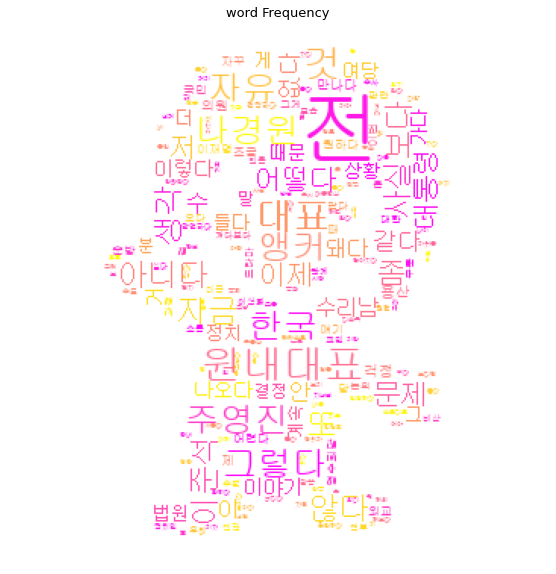

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("word Frequency", size = 13)
plt.show

In [39]:
from PIL import Image
import numpy as np

In [35]:
mask_image = np.array(Image.open(r"C:\Users\user\Desktop\다운로드.jfif"))